In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [33]:
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)


Saving Data for repository.csv to Data for repository (2).csv


In [34]:
# Create target column 'Hit_Flop' (1 for Hit, 0 for Flop)
df["Hit_Flop"] = (df["Revenue(INR)"] > df["Budget(INR)"]).astype(int)

# Drop unnecessary columns
df = df.drop(columns=["Movie Name", "Revenue(INR)"])

In [35]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Release Period      1698 non-null   object
 1   Whether Remake      1698 non-null   object
 2   Whether Franchise   1698 non-null   object
 3   Genre               1698 non-null   object
 4   New Actor           1698 non-null   object
 5   New Director        1698 non-null   object
 6   New Music Director  1698 non-null   object
 7   Lead Star           1698 non-null   object
 8   Director            1698 non-null   object
 9   Music Director      1698 non-null   object
 10  Number of Screens   1698 non-null   int64 
 11  Budget(INR)         1698 non-null   int64 
 12  Hit_Flop            1698 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 172.6+ KB


,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Budget(INR),Hit_Flop
0,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,85000,1
1,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,825000,1
2,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,56700000,1
3,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,4500000,1
4,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1075000,0


In [36]:
# Convert categorical variables to numerical using Label Encoding
for column in df.columns:
    if df[column].dtype == "object":  # Check if the column is categorical
        df[column] = LabelEncoder().fit_transform(df[column])

df_encoded = df.copy()

In [37]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Release Period      1698 non-null   int64
 1   Whether Remake      1698 non-null   int64
 2   Whether Franchise   1698 non-null   int64
 3   Genre               1698 non-null   int64
 4   New Actor           1698 non-null   int64
 5   New Director        1698 non-null   int64
 6   New Music Director  1698 non-null   int64
 7   Lead Star           1698 non-null   int64
 8   Director            1698 non-null   int64
 9   Music Director      1698 non-null   int64
 10  Number of Screens   1698 non-null   int64
 11  Budget(INR)         1698 non-null   int64
 12  Hit_Flop            1698 non-null   int64
dtypes: int64(13)
memory usage: 172.6 KB


In [38]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=["Hit_Flop"])
y = df_encoded["Hit_Flop"]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Decision Tree

In [39]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("Classification Report - Decision Tree:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8794
Classification Report - Decision Tree:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        95
           1       0.91      0.92      0.92       245

    accuracy                           0.88       340
   macro avg       0.85      0.85      0.85       340
weighted avg       0.88      0.88      0.88       340



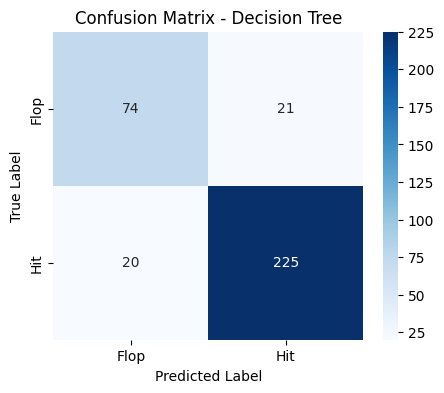

In [40]:
# Confusion matrix for Decision Tree
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues", xticklabels=["Flop", "Hit"], yticklabels=["Flop", "Hit"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [41]:
dt = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid_dt = {
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search with Cross-Validation
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)


print("Best Parameters:", grid_search_dt.best_params_)
print("Best Cross-Validation Score:", grid_search_dt.best_score_)

# Evaluate the best model on the test set
y_pred_grd_dt = grid_search_dt.best_estimator_.predict(X_test)


print("\nTest Accuracy:", accuracy_score(y_test, y_pred_grd_dt))
print("\nClassification Report for Tuned Decision Tree:\n")
print(classification_report(y_test, y_pred_grd_dt, target_names=['Flop', 'Hit']))


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9072229059628696

Test Accuracy: 0.9176470588235294

Classification Report for Tuned Decision Tree:

              precision    recall  f1-score   support

        Flop       0.86      0.84      0.85        95
         Hit       0.94      0.95      0.94       245

    accuracy                           0.92       340
   macro avg       0.90      0.89      0.90       340
weighted avg       0.92      0.92      0.92       340



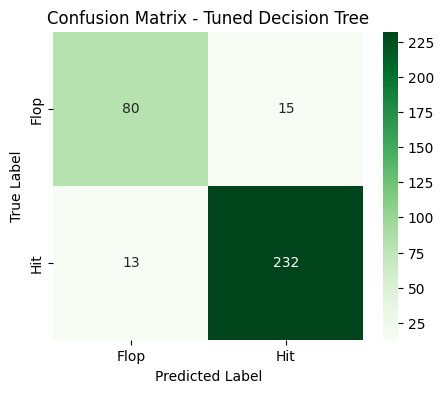

In [42]:
# Plot confusion matrix for tuned Decision Tree
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_grd_dt), annot=True, fmt="d", cmap="Greens", xticklabels=["Flop", "Hit"], yticklabels=["Flop", "Hit"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.show()

# Naive Bayes

In [43]:
# Initialize the Naïve Bayes Classifier
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Naïve Bayes Accuracy: {accuracy_nb:.4f}")
print("Classification Report - Naïve Bayes:\n", classification_report(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.8588
Classification Report - Naïve Bayes:
               precision    recall  f1-score   support

           0       0.85      0.60      0.70        95
           1       0.86      0.96      0.91       245

    accuracy                           0.86       340
   macro avg       0.86      0.78      0.81       340
weighted avg       0.86      0.86      0.85       340



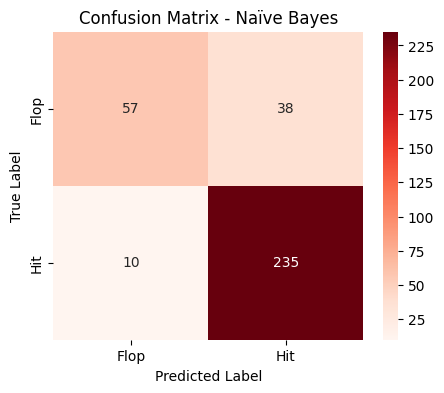

In [44]:
# Plot confusion matrix for Naïve Bayes
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Reds", xticklabels=["Flop", "Hit"], yticklabels=["Flop", "Hit"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()


In [45]:
# Define the Naïve Bayes model
nb = GaussianNB()

# Define hyperparameter grid for Naïve Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(-9, 0, 10)  # Testing values from 10^(-9) to 10^(0)
}

# Perform Grid Search with Cross-Validation
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train, y_train)


print("Best Parameters:", grid_search_nb.best_params_)
print("Best Cross-Validation Score:", grid_search_nb.best_score_)

# Evaluate model on the test set
y_pred_grd_nb = grid_search_nb.best_estimator_.predict(X_test)


print("\nTest Accuracy:", accuracy_score(y_test, y_pred_grd_nb))
print("\nClassification Report for Tuned Naïve Bayes:\n")
print(classification_report(y_test, y_pred_grd_nb, target_names=['Flop', 'Hit']))

Best Parameters: {'var_smoothing': 1e-09}
Best Cross-Validation Score: 0.8902759056307671

Test Accuracy: 0.8588235294117647

Classification Report for Tuned Naïve Bayes:

              precision    recall  f1-score   support

        Flop       0.85      0.60      0.70        95
         Hit       0.86      0.96      0.91       245

    accuracy                           0.86       340
   macro avg       0.86      0.78      0.81       340
weighted avg       0.86      0.86      0.85       340



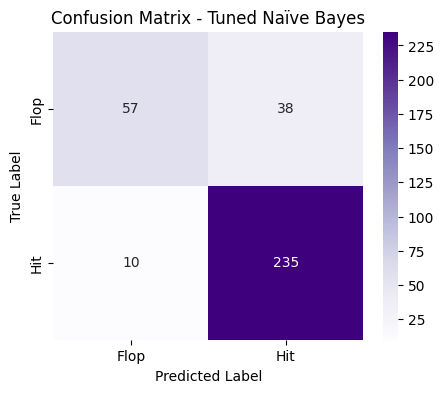

In [46]:
# Confusion matrix for tuned Naïve Bayes
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_grd_nb), annot=True, fmt="d", cmap="Purples", xticklabels=["Flop", "Hit"], yticklabels=["Flop", "Hit"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned Naïve Bayes")
plt.show()
